In [76]:
import pandas as pd
import numpy as np
import seaborn as sns

In [77]:
df=pd.read_csv("/Users/nikkiruhil/Desktop/sms_spam_classifier/sms_data.csv")
#.sample gives random 
df.sample(5)

,Category,Message
1639,ham,Great comedy..cant stop laughing da:)
1153,ham,Ok i go change also...
4865,ham,Sorry da..today i wont come to play..i have dr...
1040,ham,They just talking thats it de. They wont any o...
921,ham,When u wana see it then


In [78]:
#data cleaning
#EDA
#Text Preprocessing
#Model Building
#Evaluation
#improvements
#website
#deploy

# data cleaning

In [80]:
#text to number(0 & 1)
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Category"]=encoder.fit_transform(df['Category'])

In [81]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [82]:
#check missing value
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [83]:
#check for duplicated value
df.duplicated().sum()

415

In [84]:
#remove duplicate
df=df.drop_duplicates(keep="first")

In [85]:
df.duplicated().sum()

0

# EDA (exploratory data analysis)

In [87]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

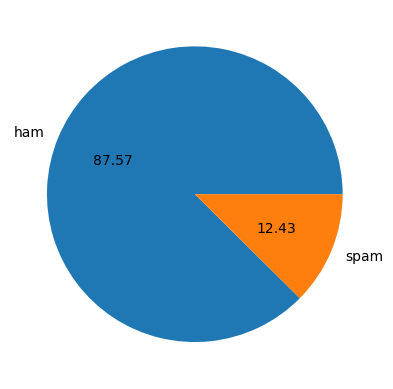

In [88]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [89]:
 import nltk

In [90]:
!pip install nltk

In [91]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/nikkiruhil/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [92]:
#create column of characters words sentences
df['msg_char']=df['Message'].apply(len)

In [93]:
df['msg_word']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df['msg_sentense']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [94]:
df.head()

,Category,Message,msg_char,msg_word,msg_sentense
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [95]:
df[['msg_char','msg_word','msg_sentense']].describe()

,msg_char,msg_word,msg_sentense
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


# Data Preprocessing

In [97]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikkiruhil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [98]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [99]:
def transform_msg(Message):
    Message=Message.lower()
    Message=nltk.word_tokenize(Message)
    y=[]
    for i in Message:
        if i.isalnum():
            y.append(i)
    Message = y[:]
    y.clear()
    for i in Message:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    Message = y[:]
    y.clear()
    for i in Message:
        y.append(ps.stem(i))
    return " ".join(y)

In [100]:
transform_msg("Hello how are u bro% dancing")

'hello u bro danc'

In [101]:
df['transformed_Msg']=df['Message'].apply(transform_msg)

In [102]:
df.head()

,Category,Message,msg_char,msg_word,msg_sentense,transformed_Msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [103]:
!pip install wordcloud

In [104]:
#word cloud show important word in bigger size
from wordcloud import WordCloud
spam_wc = WordCloud(width=500,height=500,min_font_size=10,background_color="black")

In [105]:
spam_wc.generate(df[df["Category"]==1]['transformed_Msg'].str.cat(sep=' '))

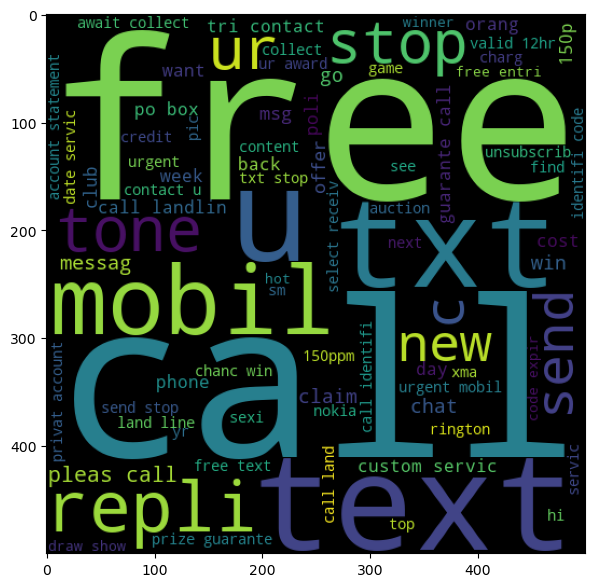

In [106]:
plt.figure(figsize=(7,7))
plt.imshow(spam_wc)

In [107]:
ham_wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [108]:
ham_wc.generate(df[df['Category'] == 0]['transformed_Msg'].str.cat(sep=' '))

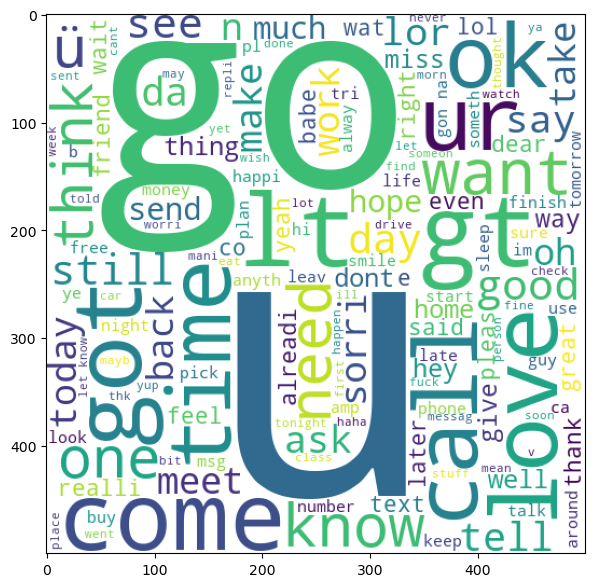

In [109]:
plt.figure(figsize=(7,7))
plt.imshow(ham_wc)

In [110]:
spam_corpus = []
#dataframe list of lists (2D array)
for msg in df[df['Category']==1]['transformed_Msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [111]:
# spam_corpus

/var/folders/g8/z4x96gwd7_5858qd2b98mgqh0000gn/T/ipykernel_1493/2201437132.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette="rainbow")


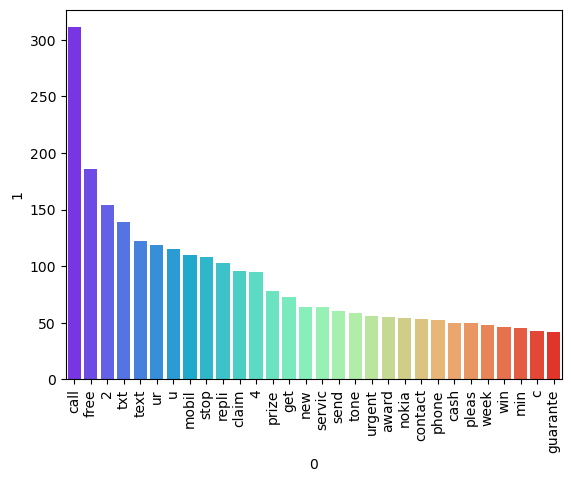

In [112]:
#to check which word comes how many times
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette="rainbow")
plt.xticks(rotation="vertical")
plt.show()

In [113]:
ham_corpus=[]
for msg in df[df["Category"]==0]["transformed_Msg"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [114]:
#ham_corpus

/var/folders/g8/z4x96gwd7_5858qd2b98mgqh0000gn/T/ipykernel_1493/3971381098.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette='rainbow')


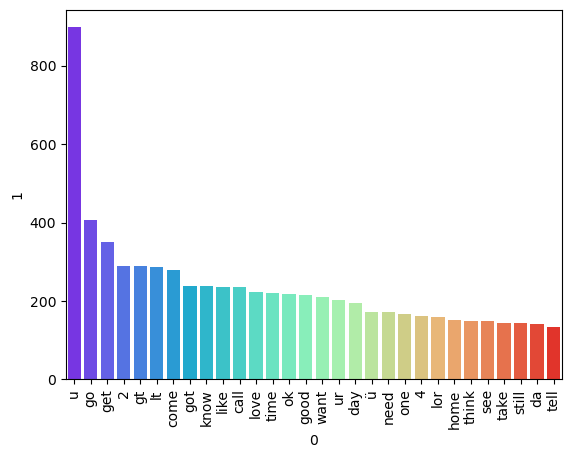

In [115]:
# 0=> words 1=> no.of times repeated
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette='rainbow')
plt.xticks(rotation="vertical")
plt.show()

In [116]:
df.head()

,Category,Message,msg_char,msg_word,msg_sentense,transformed_Msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [118]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [119]:
cv=CountVectorizer()
tf=TfidfVectorizer(max_features=3000)
x=tf.fit_transform(df['transformed_Msg']).toarray()

In [120]:
x.shape

(5157, 3000)

In [121]:
y=df['Category'].values

In [122]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2, random_state=2) 

In [125]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [126]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [127]:
gnb.fit(x_train, y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672480620155039
[[785 120]
 [ 17 110]]
0.4782608695652174


In [128]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709302325581395
[[905   0]
 [ 30  97]]
1.0


In [129]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [131]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [132]:
#dictionary
clfs={
    'SVC':svc,
    'LR':lrc,
    'MNB':mnb,
    'DT':dtc,
    'KN':knc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBC':gbc,
    'XGB':xgb
}

In [133]:
def train_classifier(clfs,x_train,y_train,x_test,y_test):
    clfs.fit(x_train,y_train)
    y_pred=clfs.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy, precision

In [134]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9757751937984496, 0.9811320754716981)

In [135]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)

    print("NAME ",name)
    print("Accuracy",current_accuracy)
    print("Precision",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

NAME  SVC
Accuracy 0.9757751937984496
Precision 0.9811320754716981
NAME  LR
Accuracy 0.9583333333333334
Precision 0.9375
NAME  MNB
Accuracy 0.9709302325581395
Precision 1.0
NAME  DT
Accuracy 0.936046511627907
Precision 0.8210526315789474
NAME  KN
Accuracy 0.9127906976744186
Precision 1.0
NAME  RF
Accuracy 0.9728682170542635
Precision 1.0
NAME  AdaBoost
Accuracy 0.9273255813953488
Precision 0.8421052631578947
NAME  BgC
Accuracy 0.9612403100775194
Precision 0.8918918918918919
NAME  ETC
Accuracy 0.9777131782945736
Precision 0.9905660377358491
NAME  GBC
Accuracy 0.9554263565891473
Precision 0.9764705882352941
NAME  XGB
Accuracy 0.9728682170542635
Precision 0.9714285714285714


In [136]:
performance_df = pd.DataFrame({'Algorithms':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [137]:
performance_df

,Algorithms,Accuracy,Precision
8,ETC,0.977713,0.990566
0,SVC,0.975775,0.981132
5,RF,0.972868,1.000000
10,XGB,0.972868,0.971429
2,MNB,0.970930,1.000000
7,BgC,0.961240,0.891892
1,LR,0.958333,0.937500
9,GBC,0.955426,0.976471
3,DT,0.936047,0.821053
6,AdaBoost,0.927326,0.842105


In [138]:
performance_df1 = pd.melt(performance_df,id_vars = 'Algorithms')

In [139]:
performance_df1

,Algorithms,variable,value
0,ETC,Accuracy,0.977713
1,SVC,Accuracy,0.975775
2,RF,Accuracy,0.972868
3,XGB,Accuracy,0.972868
4,MNB,Accuracy,0.970930
5,BgC,Accuracy,0.961240
6,LR,Accuracy,0.958333
7,GBC,Accuracy,0.955426
8,DT,Accuracy,0.936047
9,AdaBoost,Accuracy,0.927326


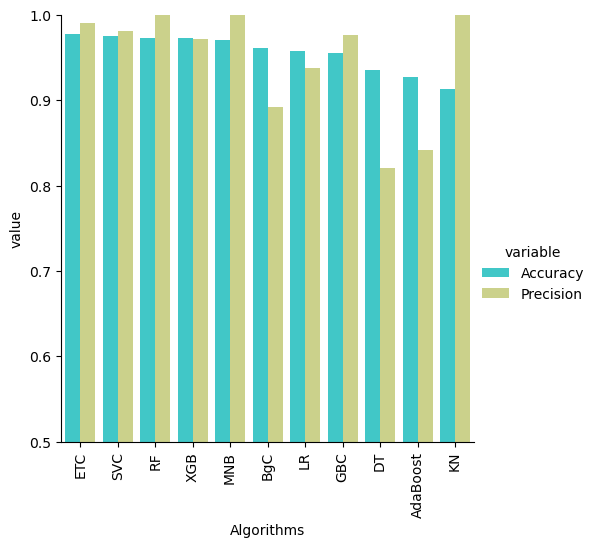

In [140]:
sns.catplot(x='Algorithms',y='value',hue='variable',data=performance_df1,kind="bar",palette='rainbow',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

# improve model

In [142]:
# change max_features parameter in tfidf

In [143]:
temp_df = pd.DataFrame({'Algorithms':clfs.keys(), 'Accuracy_max_ft_3000':accuracy_scores, 'Precision_max_ft_3000':precision_scores})

In [144]:
performance_df.merge(temp_df, on = 'Algorithms')

,Algorithms,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,ETC,0.977713,0.990566,0.977713,0.990566
1,SVC,0.975775,0.981132,0.975775,0.981132
2,RF,0.972868,1.000000,0.972868,1.000000
3,XGB,0.972868,0.971429,0.972868,0.971429
4,MNB,0.970930,1.000000,0.970930,1.000000
5,BgC,0.961240,0.891892,0.961240,0.891892
6,LR,0.958333,0.937500,0.958333,0.937500
7,GBC,0.955426,0.976471,0.955426,0.976471
8,DT,0.936047,0.821053,0.936047,0.821053
9,AdaBoost,0.927326,0.842105,0.927326,0.842105


In [145]:
# Scaling - MinMaxScaler() but not give good result so avoid

In [146]:
# add number of characters in input 

In [147]:
# use voting classifier to create combination of best performing model

In [148]:
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()

In [149]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [150]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [151]:
y_pred = voting.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9815891472868217
Precision 1.0


In [152]:
etc.fit(x_train,y_train)
y_pred=etc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9777131782945736
0.9905660377358491


In [153]:
import pickle

In [154]:
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))